In [57]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel(r"C:\Users\82106\Desktop\제주도\클러스터링\제주도_클러스터링_데이터.xlsx")
df

,정류소아이디,버스개수,배차간격,이용자수,거주인구,근무인구,방문인구,학교수,교사수,학생수,주당수업시수,종속변수
0,1,3.044944,36.882022,46.207865,1.424681e+05,19097.655444,144384.736747,2,97,1083,688,15.175277
1,6,4.561265,47.786561,69.972332,1.187076e+06,112441.264996,458597.838130,10,641,9283,620,15.340555
2,7,3.385185,44.962963,99.696296,1.189324e+06,111493.669348,455381.134741,10,641,9283,620,29.450766
3,8,1.000000,47.500000,129.500000,1.058966e+06,84274.863500,514853.693500,10,641,9283,620,129.500000
4,9,6.505774,48.845266,65.667436,1.188479e+06,111958.761651,455749.051640,10,641,9283,620,10.093717
...,...,...,...,...,...,...,...,...,...,...,...,...
614,4290,1.000000,77.500000,42.222222,8.236243e+05,89305.849000,295616.037222,10,630,9754,999,42.222222
615,4298,1.111111,50.000000,68.333333,7.490121e+05,71571.872889,435507.351111,17,450,4273,330,61.500000
616,4306,2.000000,37.500000,16.000000,9.772078e+04,9562.514000,71327.365500,2,90,209,267,8.000000
617,4371,1.831461,30.000000,17.292135,7.586625e+05,67321.041191,447471.915404,17,450,4273,330,9.441718


In [58]:
df1 = df[['거주인구','근무인구','방문인구']]
df1

,거주인구,근무인구,방문인구
0,1.424681e+05,19097.655444,144384.736747
1,1.187076e+06,112441.264996,458597.838130
2,1.189324e+06,111493.669348,455381.134741
3,1.058966e+06,84274.863500,514853.693500
4,1.188479e+06,111958.761651,455749.051640
...,...,...,...
614,8.236243e+05,89305.849000,295616.037222
615,7.490121e+05,71571.872889,435507.351111
616,9.772078e+04,9562.514000,71327.365500
617,7.586625e+05,67321.041191,447471.915404


In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df1_scaled = sc.fit_transform(df1)
df1_scaled_df = pd.DataFrame(df1_scaled, columns=df1.columns)
df_c = df1_scaled_df.dropna()
df_c

,거주인구,근무인구,방문인구
0,-1.396714,-1.260137,-1.236947
1,1.528045,1.333335,1.177827
2,1.534338,1.307006,1.153106
3,1.169354,0.550755,1.610161
4,1.531975,1.319929,1.155933
...,...,...,...
614,0.510430,0.690537,-0.074712
615,0.301526,0.197814,1.000373
616,-1.522001,-1.525063,-1.798403
617,0.328546,0.079708,1.092322


In [60]:
# 표준화 확인
print("\n평균:")
print(df_c.mean())
print("\n표준편차:")
print(df_c.std())


평균:
거주인구    2.754931e-16
근무인구   -3.328875e-16
방문인구   -4.505461e-16
dtype: float64

표준편차:
거주인구    1.000809
근무인구    1.000809
방문인구    1.000809
dtype: float64


C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Window

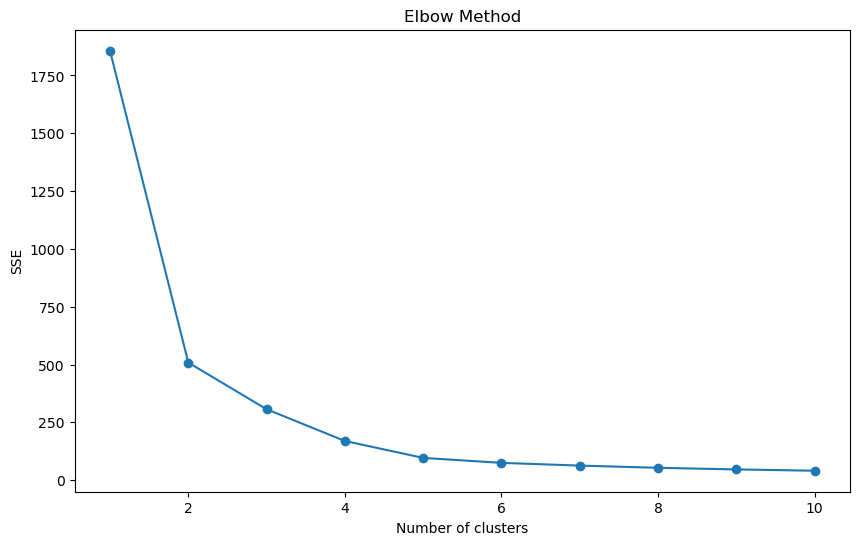

In [61]:
# Elbow Method 적용하여 최적의 클러스터 수 찾기
sse = []
for i in range(1, 11):  # 클러스터 수를 1에서 10까지 시도
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_c)
    sse.append(kmeans.inertia_)  # 각 클러스터 수에 대한 SSE 저장

# SSE 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Window

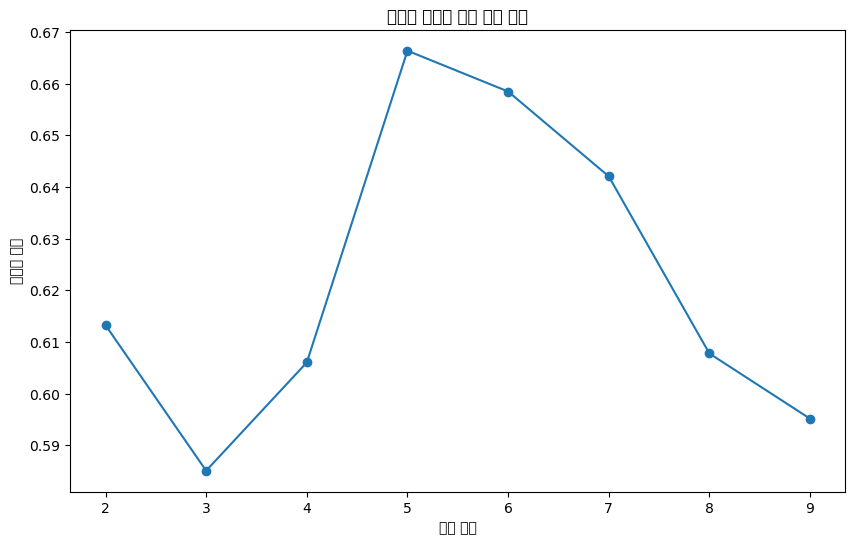

In [62]:
from sklearn.metrics import silhouette_score 

# 군집 개수별로 실루엣 계수 계산
silhouette_coefficients = []
for i in range(2, 10):  # 실루엣 계수는 최소 2개의 클러스터가 필요
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_c)
    score = silhouette_score(df_c, kmeans.labels_)
    silhouette_coefficients.append(score)

# 실루엣 계수 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_coefficients, marker='o')
plt.title('실루엣 계수에 따른 군집 개수')
plt.xlabel('군집 개수')
plt.ylabel('실루엣 계수')
plt.show()

In [63]:
kmeans=KMeans(n_clusters = 5, random_state = 0,init='k-means++')
clusters = kmeans.fit(df_c)

C:\Users\82106\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [64]:
#클러스터링 품질 측정 : 실루엣 계수 측정
silhouette_avg = silhouette_score(df_c, clusters.labels_)
print(f'클러스터링의 실루엣 계수: {silhouette_avg}')

클러스터링의 실루엣 계수: 0.6663636686587175


In [65]:
df_c['cluster'] = clusters.labels_
df_c.groupby('cluster').count()

,거주인구,근무인구,방문인구
cluster,,,
0,109,109,109
1,135,135,135
2,145,145,145
3,147,147,147
4,83,83,83


In [66]:
df_c.groupby('cluster').mean()

,거주인구,근무인구,방문인구
cluster,,,
0,0.517054,0.559333,-0.112292
1,-1.287665,-1.322981,-1.411927
2,1.312005,1.355975,1.207110
3,-0.683279,-0.587724,-0.390758
4,0.333460,0.089328,1.027234


Cluster 0:

거주인구가 평균보다 약간 많은 편(0.517054)
근무인구가 평균보다 약간 많은 편(0.559333)
방문인구가 평균보다 약간 적은 편(-0.112292)

이 군집은 거주인구와 근무인구가 평균 수준을 약간 상회하는 지역
방문인구는 평균보다 약간 적은 편이지만, 전반적으로 인구 규모가 평균 수준에 근접한 지역으로 판단됨

Cluster 1:

거주인구가 평균보다 상당히 적은 편(-1.287665)
근무인구가 평균보다 상당히 적은 편(-1.322981)
방문인구가 평균보다 상당히 적은 편(-1.411927)

이 군집은 전반적인 인구 규모가 매우 작은 지역
거주인구, 근무인구, 방문인구 모두가 평균에 크게 미치지 못하는 수준

Cluster 2:

거주인구가 평균보다 상당히 많은 편(1.312005)
근무인구가 평균보다 상당히 많은 편(1.355975)
방문인구가 평균보다 상당히 많은 편(1.207110)

거주인구, 근무인구, 방문인구 모두가 평균을 크게 상회하고 있어, 해당 지역이 인구 밀집도가 높은 지역

Cluster 3:

거주인구가 평균보다 약간 적은 편(-0.683279)
근무인구가 평균보다 약간 적은 편(-0.587724)
방문인구가 평균보다 약간 적은 편(-0.390758)

전반적인 인구 규모가 평균 수준에 근접한 지역으로 볼 수 있습니다. 
거주인구, 근무인구, 방문인구 모두가 평균보다 약간 적은 편

Cluster 4:

거주인구가 평균보다 약간 많은 편(0.333460)
근무인구가 평균보다 약간 적은 편(0.089328)
방문인구가 평균보다 상당히 많은 편(1.027234)

이 군집은 방문인구가 평균을 크게 상회하고 있는 지역으로 볼 수 있습니다.
거주인구는 평균보다 약간 많은 편이지만, 근무인구는 평균보다 약간 적은 편이지만, 해당 지역이 관광 등의 이유로 방문객이 많이 유입되는 지역일 가능성이 높음

In [67]:
from sklearn.decomposition import PCA
X = df_c.copy()

pca = PCA(n_components = 2)

pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-2.41235002, -0.26783735],
       [ 2.26205955, -0.59652178],
       [ 2.23692231, -0.59256074],
       ...,
       [-2.94959785, -0.20293335],
       [ 1.39579521,  1.88829272],
       [ 2.7437992 , -0.67512777]])

In [68]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = df_c['cluster']
pca_df.head()

,0,1,cluster
0,-2.412350,-0.267837,1
1,2.262060,-0.596522,2
2,2.236922,-0.592561,2
3,1.889210,-0.267110,2
4,2.244283,-0.595307,2


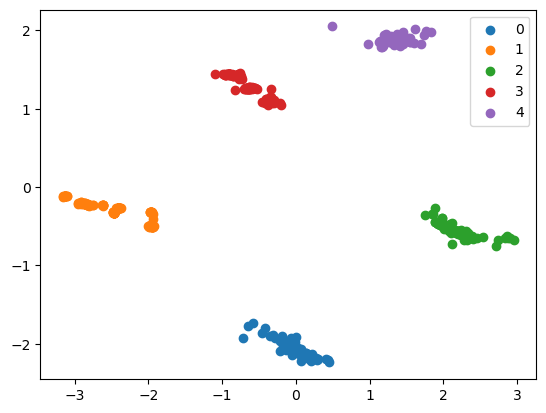

In [69]:
for i in sorted(pca_df['cluster'].unique()):
        tmp = pca_df.loc[pca_df['cluster']==i]
        plt.scatter(tmp[0],tmp[1])
        plt.legend(sorted(pca_df['cluster'].unique()))

In [73]:
c_join = pd.concat([df_c,df], axis = 1)
c_join = c_join[['정류소아이디','cluster']]
c_join

c_join.to_excel(r"C:\Users\82106\Desktop\제주도\클러스터링\제주도_클러스터링_인구.xlsx",index=False)
